<a href="https://colab.research.google.com/github/ShionFujimori/mnist-digit-classification/blob/master/mnist_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# load datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=3)
x_valid = np.expand_dims(x_valid, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_valid shape: {x_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (48000, 28, 28, 1)
y_train shape: (48000,)
x_valid shape: (12000, 28, 28, 1)
y_valid shape: (12000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


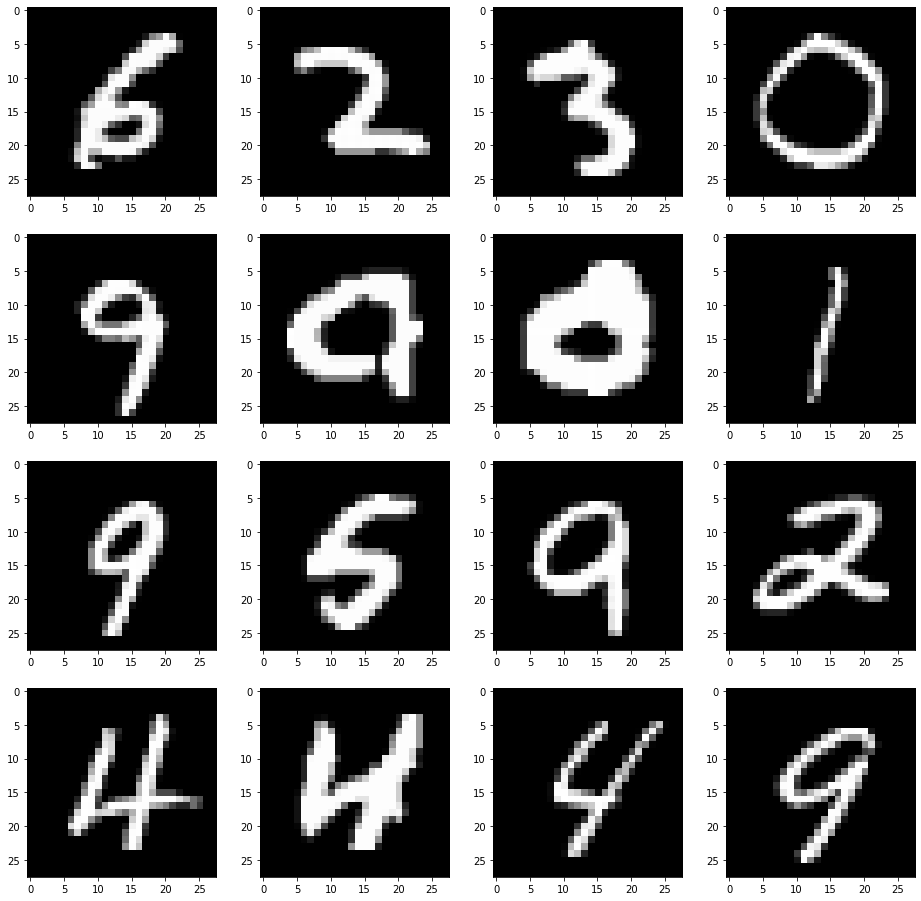

In [3]:
# visualize the data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 16))
for i in range(16):
  fig.add_subplot(4, 4, i+1).imshow(x_train[i].reshape(28, 28), cmap='gray')
plt.show()

In [4]:
# model structure
model = keras.models.Sequential([
  # first layer
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  # second layer
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  # flatten the tensor
  keras.layers.Flatten(),
  # 512 neuron hidden layer
  keras.layers.Dense(256, activation='relu'),
  # output layer: paper, rock, scissors
  keras.layers.Dense(10, activation='softmax')                                 
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [0]:
# compile the mode
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
# define Callback class
acc_goal = 0.99
class Callback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_acc') > acc_goal:
      print(f'\nReached {acc_goal} accuracy so cancelling training')
      self.model.stop_training = True

callbacks = Callback()


In [7]:
# training (fitting)
epoch = 10
batch_size = 512
steps = (x_train.shape[0]-1) // batch_size + 1

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    steps_per_epoch=steps,
    epochs=epoch,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/10
94/94 [==============================] - 1s 10ms/step - loss: 0.4391 - acc: 0.8818 - val_loss: 0.1281 - val_acc: 0.9623
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0954 - acc: 0.9715 - val_loss: 0.0725 - val_acc: 0.9781
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0570 - val_acc: 0.9827
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0491 - acc: 0.9857 - val_loss: 0.0542 - val_acc: 0.9835
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0413 - acc: 0.9871 - val_loss: 0.0482 - val_acc: 0.9864
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0341 - acc: 0.9894 - val_loss: 0.0476 - val_acc: 0.9868
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0300 - acc: 0.9909 - val_loss: 0.0419 - val_acc: 0.9872
Epoch 8/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0258 - acc: 0.9

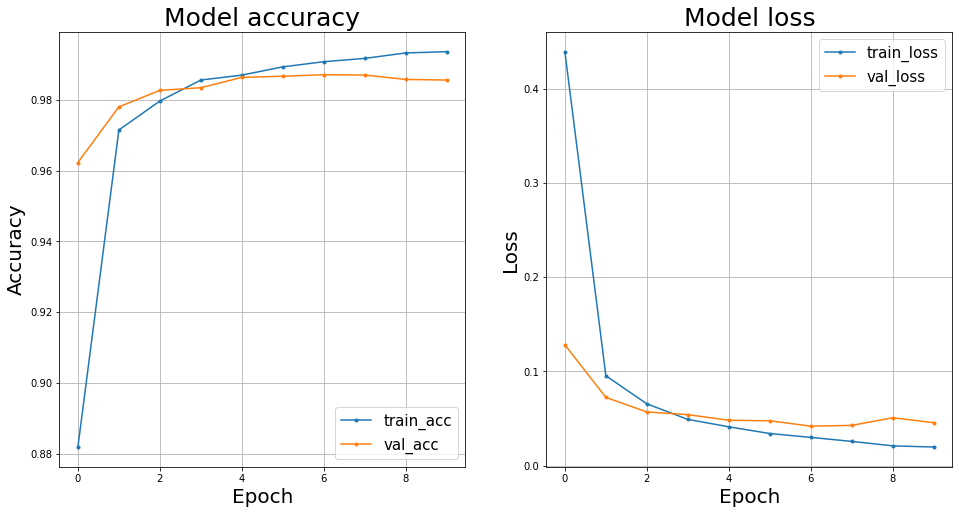

In [9]:
# visualize the training results (vs epoch)
fig = plt.figure(figsize=(16, 8))

# Model accuracy vs epoch
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['acc'], marker='.', label='train_acc')
ax1.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('Model accuracy', fontsize=25)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc='lower right', fontsize=15)

# Model loss vs epoch
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history.history['loss'], marker='.', label='train_loss')
ax2.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('Model loss', fontsize=25)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.grid()
plt.legend(loc='upper right', fontsize=15)

plt.show()

In [10]:
# evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0340 - acc: 0.9880


In [11]:
# running the model
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, color_mode='grayscale', target_size=(28, 28))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)

  classes = model.predict(img, batch_size=1)
  print(fn + ' is: ' + str(np.argmax(classes[0])))


Saving ex7.png to ex7 (2).png
ex7.png is: 7
